In [42]:
import pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split

In [43]:
df=pd.read_csv(r"C:\Users\sayan\OneDrive\Desktop\avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [44]:
df=pd.DataFrame(data=df)
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [45]:
df.head(50)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,conventional,2015,Albany


In [46]:
df.tail(50)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18199,10,2018-01-14,1.25,4343.09,116.19,64.16,0.00,4162.74,1986.09,2176.65,0.00,organic,2018,Syracuse
18200,11,2018-01-07,1.25,4764.47,59.95,133.89,0.00,4570.63,3125.05,1445.58,0.00,organic,2018,Syracuse
18201,0,2018-03-25,1.41,10028.49,138.15,773.22,0.00,9117.12,8208.82,908.30,0.00,organic,2018,Tampa
18202,1,2018-03-18,1.50,10311.24,190.28,901.77,0.00,9219.19,7687.03,1532.16,0.00,organic,2018,Tampa
18203,2,2018-03-11,1.31,8115.07,101.14,392.38,0.00,7621.55,7494.08,127.47,0.00,organic,2018,Tampa
18204,3,2018-03-04,1.51,9851.33,223.68,839.86,0.00,8787.79,7327.76,1460.03,0.00,organic,2018,Tampa
18205,4,2018-02-25,1.37,9144.20,206.39,542.89,0.00,8394.92,7895.92,499.00,0.00,organic,2018,Tampa
18206,5,2018-02-18,1.50,8534.53,131.47,781.00,0.00,7622.06,6452.23,1169.83,0.00,organic,2018,Tampa
18207,6,2018-02-11,1.34,8467.46,40.73,486.03,0.00,7940.70,7499.96,440.74,0.00,organic,2018,Tampa
18208,7,2018-02-04,1.32,7363.56,89.59,440.31,0.00,6833.66,6827.78,5.88,0.00,organic,2018,Tampa


In [47]:
df.sample()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18060,3,2018-03-04,1.43,14173.27,397.48,3653.91,119.44,10002.44,9479.36,523.08,0.0,organic,2018,RichmondNorfolk


In [48]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

# date type change into int 

In [58]:
df['Date']=df['Date'].str.replace("-",'').apply(int)

In [59]:
df.dtypes

Unnamed: 0        int64
Date              int64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [60]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,20151227,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20151220,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,20151213,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,20151206,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,20151129,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,20180204,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,20180128,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,20180121,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,20180114,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [61]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [62]:
le=LabelEncoder()
list1=['type','region']
for i in list1:
    df[i]=le.fit_transform(df[i].astype(str))
df        

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,20151227,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,20151220,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,20151213,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,20151206,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,20151129,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,20180204,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,8,20180128,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,9,20180121,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,10,20180114,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [63]:
df['XLarge Bags'].value_counts()

0.00       12048
3.33          29
6.67          16
1.11          15
5.00          12
           ...  
3018.05        1
2739.44        1
9301.67        1
8640.00        1
24.18          1
Name: XLarge Bags, Length: 5588, dtype: int64

In [64]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  int64  
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  int32  
 12  year          18249 non-null  int64  
 13  region        18249 non-null  int32  
dtypes: float64(9), int32(2), int64(3)
memory usage: 1.8 MB


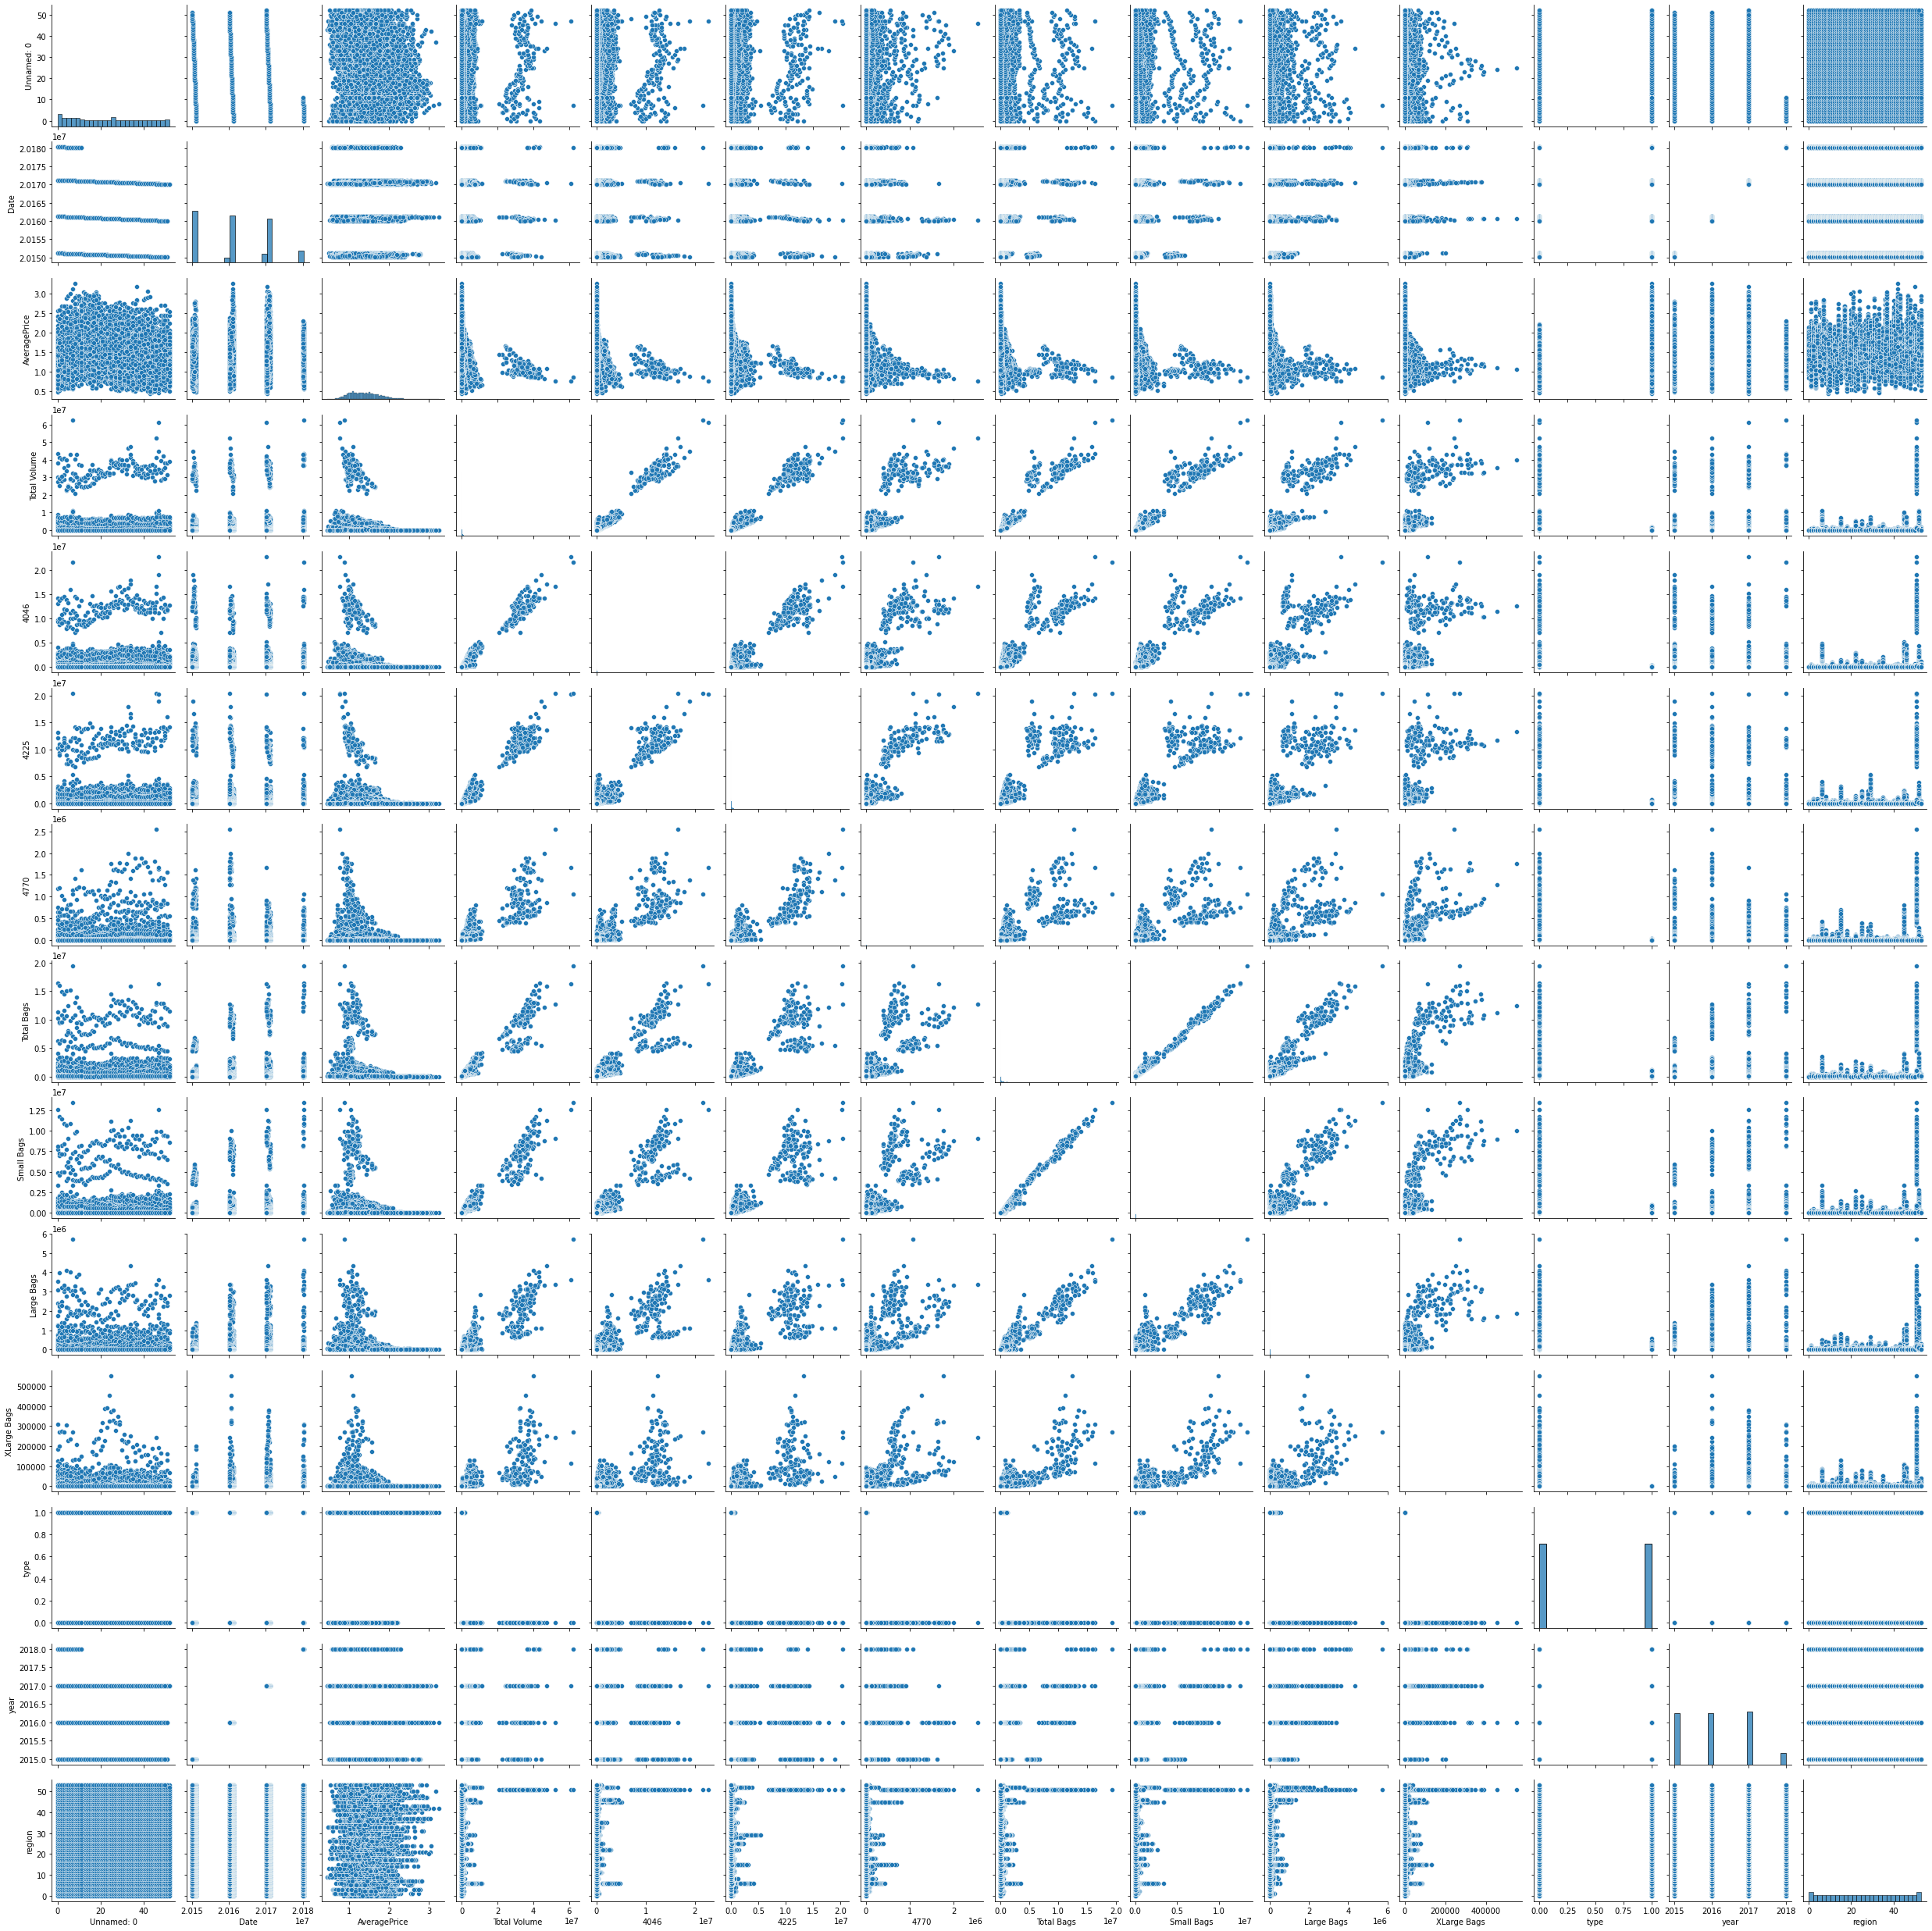

In [67]:
sns.pairplot(df)

Unnamed: 0         AxesSubplot(0.125,0.657941;0.0731132x0.222059)
Date            AxesSubplot(0.212736,0.657941;0.0731132x0.222059)
AveragePrice    AxesSubplot(0.300472,0.657941;0.0731132x0.222059)
Total Volume    AxesSubplot(0.388208,0.657941;0.0731132x0.222059)
4046            AxesSubplot(0.475943,0.657941;0.0731132x0.222059)
4225            AxesSubplot(0.563679,0.657941;0.0731132x0.222059)
4770            AxesSubplot(0.651415,0.657941;0.0731132x0.222059)
Total Bags      AxesSubplot(0.739151,0.657941;0.0731132x0.222059)
Small Bags      AxesSubplot(0.826887,0.657941;0.0731132x0.222059)
Large Bags         AxesSubplot(0.125,0.391471;0.0731132x0.222059)
XLarge Bags     AxesSubplot(0.212736,0.391471;0.0731132x0.222059)
type            AxesSubplot(0.300472,0.391471;0.0731132x0.222059)
year            AxesSubplot(0.388208,0.391471;0.0731132x0.222059)
region          AxesSubplot(0.475943,0.391471;0.0731132x0.222059)
dtype: object

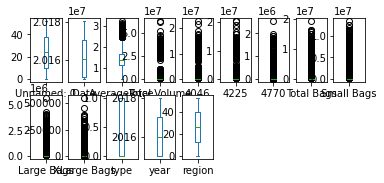

In [70]:
df.plot(kind='box',subplots=True,layout=(3,9))

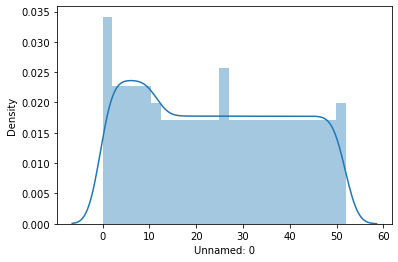

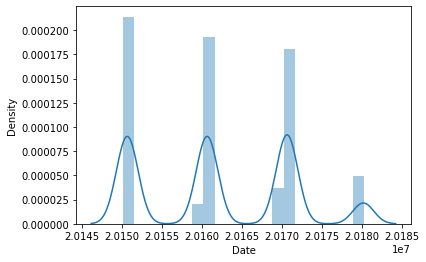

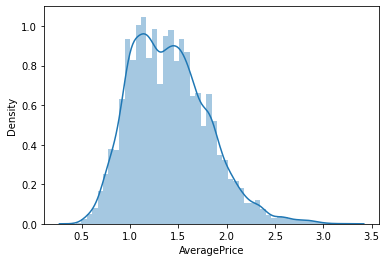

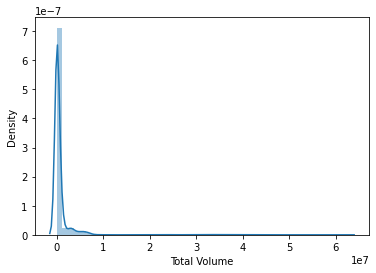

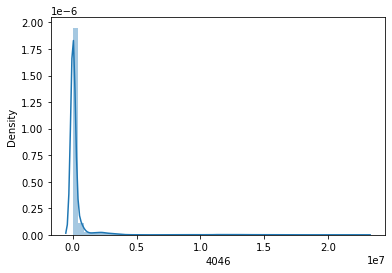

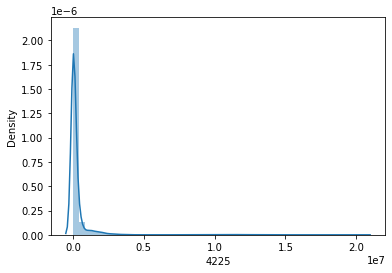

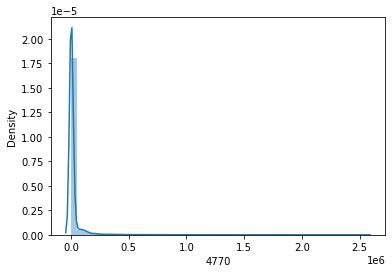

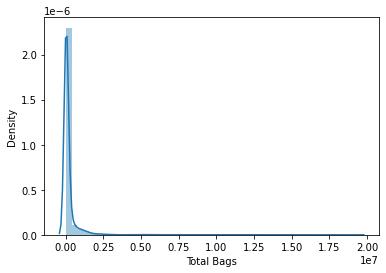

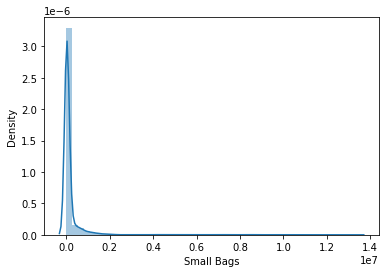

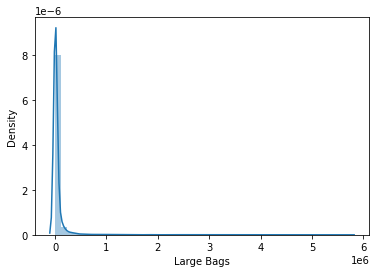

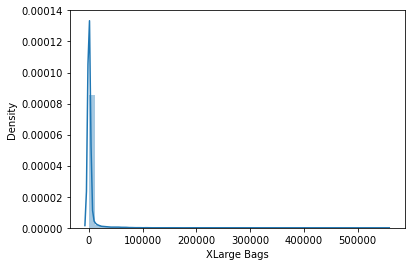

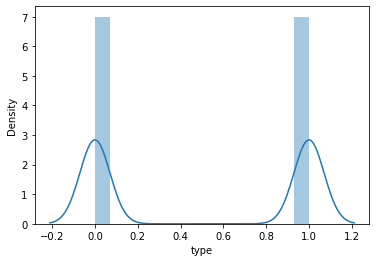

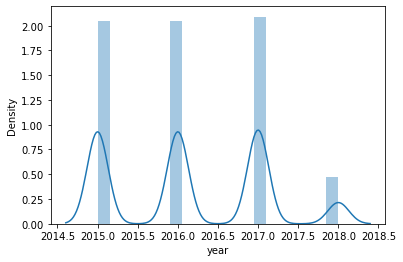

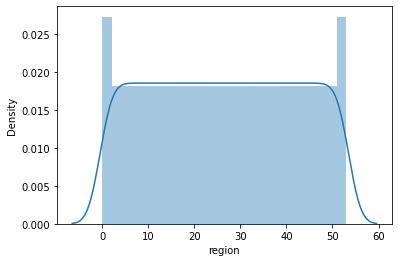

In [71]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>],
       [<AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>],
       [<AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'type'}>],
       [<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'region'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

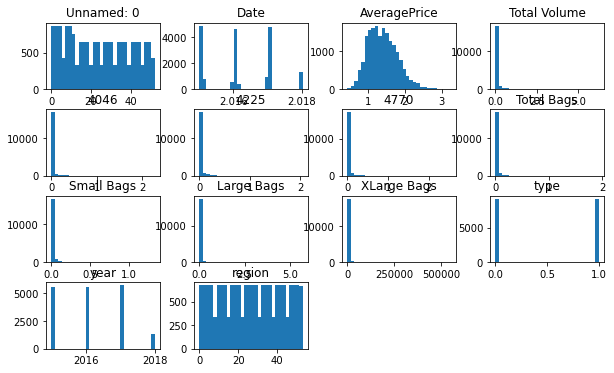

In [72]:
df.hist(grid=False,
       figsize=(10, 6),
       bins=30)   

In [73]:
df.describe()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,1.824900e+04,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,24.232232,2.016211e+07,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,15.481045,9.343337e+03,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.000000,2.015010e+07,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,10.000000,2.015102e+07,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,24.000000,2.016081e+07,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,38.000000,2.017060e+07,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000
max,52.000000,2.018032e+07,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


In [79]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [74]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.565327,1.165073,0.188689,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558,0.999836,1.221282,1.700252
1,1.500730,1.165822,0.139020,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558,0.999836,1.221282,1.700252
2,1.436133,1.166571,1.182069,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558,0.999836,1.221282,1.700252
3,1.371536,1.167320,0.809551,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558,0.999836,1.221282,1.700252
4,1.306939,1.175562,0.312861,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558,0.999836,1.221282,1.700252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.113149,1.936367,0.556347,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558,1.000164,1.970504,1.700811
18245,1.048552,1.928232,0.755023,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558,1.000164,1.970504,1.700811
18246,0.983955,1.927483,1.152375,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558,1.000164,1.970504,1.700811
18247,0.919358,1.926734,1.301382,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558,1.000164,1.970504,1.700811


In [75]:
z.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [76]:
threshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([ 4,  4, 10, ...,  2,  2,  2], dtype=int64))


In [77]:
df_new=df[(z<3).all(axis=1)]
df_new

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,20151227,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,20151220,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,20151213,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,20151206,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,20151129,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,20180204,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,8,20180128,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,9,20180121,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,10,20180114,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [78]:
df_new.skew()

Unnamed: 0      0.106116
Date            0.204833
AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

In [80]:
df_new['Total Volume']=np.sqrt(df['Total Volume'])

In [81]:
df_new['4225']=np.sqrt(df['4225'])

In [82]:
df_new['4046']=np.sqrt(df['4046'])

In [83]:
df_new['4770']=np.sqrt(df['4770'])

In [84]:
df_new['Total Bags']=np.sqrt(df['Total Bags'])

In [85]:
df_new['Small Bags']=np.sqrt(df['Small Bags'])

In [86]:
df_new['Large Bags']=np.sqrt(df['Large Bags'])

In [91]:
df_new['XLarge Bags']=np.sqrt(df['XLarge Bags'])

In [88]:
df_new['Small Bags']=np.sqrt(df['Small Bags'])

In [92]:
df_new.skew()

Unnamed: 0      0.106116
Date            0.204833
AveragePrice    0.377432
Total Volume    1.963864
4046            2.497504
4225            2.128505
4770            2.636658
Total Bags      2.010691
Small Bags      2.093752
Large Bags      2.236756
XLarge Bags     3.312484
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

In [89]:
df_new.corr()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Unnamed: 0,1.000000,-0.201319,-0.126781,0.013095,0.015944,0.030097,0.057291,-0.026787,-0.027452,-0.028289,-0.027053,0.004325,-0.170651,-0.001651
Date,-0.201319,1.000000,0.097936,0.022484,-0.016736,-0.029965,-0.097323,0.148052,0.128420,0.160305,0.141706,0.003528,0.999304,-0.004439
AveragePrice,-0.126781,0.097936,1.000000,-0.477348,-0.486646,-0.383075,-0.387621,-0.447396,-0.409643,-0.404012,-0.246919,0.613150,0.091704,-0.003242
Total Volume,0.013095,0.022484,-0.477348,1.000000,0.895971,0.929923,0.751253,0.947676,0.939371,0.725003,0.594145,-0.636524,0.023210,0.078935
4046,0.015944,-0.016736,-0.486646,0.895971,1.000000,0.700307,0.646770,0.813427,0.797807,0.660573,0.534654,-0.559204,-0.015959,0.145330
4225,0.030097,-0.029965,-0.383075,0.929923,0.700307,1.000000,0.736356,0.850131,0.858570,0.598958,0.519927,-0.605224,-0.028971,0.018974
4770,0.057291,-0.097323,-0.387621,0.751253,0.646770,0.736356,1.000000,0.671898,0.684217,0.442492,0.591153,-0.530977,-0.095625,-0.061201
Total Bags,-0.026787,0.148052,-0.447396,0.947676,0.813427,0.850131,0.671898,1.000000,0.977625,0.796421,0.616514,-0.583714,0.147646,0.091135
Small Bags,-0.027452,0.128420,-0.409643,0.939371,0.797807,0.858570,0.684217,0.977625,1.000000,0.662069,0.622866,-0.578717,0.128055,0.079266
Large Bags,-0.028289,0.160305,-0.404012,0.725003,0.660573,0.598958,0.442492,0.796421,0.662069,1.000000,0.395390,-0.425377,0.159790,0.127525


<AxesSubplot:>

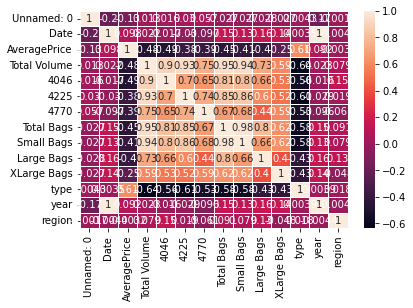

In [93]:
sns.heatmap(df_new.corr(),annot=True,linewidth=0.5)

In [94]:
df_new.corr()['AveragePrice'].sort_values()

4046           -0.486646
Total Volume   -0.477348
Total Bags     -0.447396
Small Bags     -0.409643
Large Bags     -0.404012
4770           -0.387621
4225           -0.383075
XLarge Bags    -0.246919
Unnamed: 0     -0.126781
region         -0.003242
year            0.091704
Date            0.097936
type            0.613150
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

In [95]:
df_new.corr()['region'].sort_values()

4770           -0.061201
XLarge Bags    -0.048198
Date           -0.004439
year           -0.004417
AveragePrice   -0.003242
Unnamed: 0     -0.001651
type            0.018409
4225            0.018974
Total Volume    0.078935
Small Bags      0.079266
Total Bags      0.091135
Large Bags      0.127525
4046            0.145330
region          1.000000
Name: region, dtype: float64

In [96]:
df_new.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [97]:
df_new.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [98]:
x=df_new.drop(["AveragePrice","region"],axis=1)
x


,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,0,20151227,253.449443,32.198447,233.355630,6.939741,93.257010,92.755701,9.656604,0.0,0,2015
1,1,20151220,234.258362,25.966902,211.278986,7.637408,97.496461,96.995206,9.873702,0.0,0,2015
2,2,20151213,343.831674,28.190424,330.378071,11.423660,90.251593,89.678370,10.155787,0.0,0,2015
3,3,20151206,281.055422,33.645208,268.284196,8.519390,76.230965,75.348524,11.565466,0.0,0,2015
4,4,20151129,225.919455,30.683546,209.376193,8.705171,78.638095,77.370925,14.060228,0.0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,20180204,130.670693,45.243342,39.104987,0.000000,116.183777,114.310192,20.781001,0.0,1,2018
18245,8,20180128,117.847529,34.521008,58.579006,0.000000,96.254039,94.551785,18.022209,0.0,1,2018
18246,9,20180121,117.331837,34.524194,49.525650,26.980363,96.923217,96.704705,6.504614,0.0,1,2018
18247,10,20180114,127.299725,39.084908,54.598901,26.963123,104.735572,104.496603,7.071068,0.0,1,2018


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  int64  
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  int32  
 12  year          18249 non-null  int64  
 13  region        18249 non-null  int32  
dtypes: float64(9), int32(2), int64(3)
memory usage: 1.8 MB


In [104]:
y1=df_new.iloc[:,2]
y1

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17651, dtype: float64

In [106]:
y2=df_new.iloc[:,13]
y2

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 17651, dtype: int32

In [108]:
y2.value_counts()

0     338
16    338
49    338
44    338
39    338
38    338
35    338
34    338
32    338
30    338
26    338
23    338
19    338
18    338
27    338
8     338
2     338
13    338
12    338
11    338
4     338
5     338
10    338
9     338
20    337
1     337
28    337
33    336
41    336
40    336
14    336
50    336
31    335
24    335
25    333
48    333
21    333
53    332
7     332
22    331
17    331
36    330
3     329
37    328
47    328
43    326
29    325
46    307
42    301
45    292
6     290
15    272
52    256
51    169
Name: region, dtype: int64

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.56430271, -1.15370161, -0.42643093, ..., -0.42519052,
        -1.01904715, -1.21001338],
       [-1.49980642, -1.15445054, -0.46517779, ..., -0.42519052,
        -1.01904715, -1.21001338],
       [-1.43531013, -1.15519947, -0.24394893, ..., -0.42519052,
        -1.01904715, -1.21001338],
       ...,
       [-0.98383609,  1.93768269, -0.7012528 , ..., -0.42519052,
         0.98130886,  1.98075592],
       [-0.9193398 ,  1.93693376, -0.6811276 , ..., -0.42519052,
         0.98130886,  1.98075592],
       [-0.85484351,  1.93618483, -0.67113666, ..., -0.42519052,
         0.98130886,  1.98075592]])

In [155]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [156]:
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=.30,random_state=60)

In [160]:
lr=LinearRegression()
knr=KNeighborsRegressor()
dtr=DecisionTreeRegressor()
svr=SVR()
rf=RandomForestRegressor()
model=[lr,knr,dtr,svr,rf]
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("predicted price:",m,predm)
    print("actual price:",m,y_test)
    print('r2_score:', r2_score(y_test,predm))
    print('error:')
    print('mean absolute error:',m,mean_absolute_error(y_test,predm))
    print('mean squared error:',m,mean_squared_error(y_test,predm))
    print('root mean squarred error:',m,np.sqrt(mean_squared_error(y_test,predm)))

predicted price: LinearRegression() [1.02129885 1.60088583 1.33189014 ... 1.63773383 1.60665855 1.75336653]
actual price: LinearRegression() 8809     0.76
9831     1.28
4483     1.71
196      1.17
13325    1.53
         ... 
16616    1.80
4481     1.89
15103    1.34
13213    1.42
16778    1.45
Name: AveragePrice, Length: 5296, dtype: float64
r2_score: 0.509591444838148
error:
mean absolute error: LinearRegression() 0.21554571931935645
mean squared error: LinearRegression() 0.07467210887802023
root mean squarred error: LinearRegression() 0.27326197847124695
predicted price: KNeighborsRegressor() [1.01  1.372 1.636 ... 1.762 1.486 1.684]
actual price: KNeighborsRegressor() 8809     0.76
9831     1.28
4483     1.71
196      1.17
13325    1.53
         ... 
16616    1.80
4481     1.89
15103    1.34
13213    1.42
16778    1.45
Name: AveragePrice, Length: 5296, dtype: float64
r2_score: 0.8280348178484572
error:
mean absolute error: KNeighborsRegressor() 0.11366163141993958
mean squared error

In [159]:
predrf=rf.predict(x_test)
from sklearn.model_selection import cross_val_score
for j in range(4,10):
    rfscore=cross_val_score(rf,x,y1,cv=j)
    rfcv=rfscore.mean()
    print('at cv:-',j)
    print('crossvalidation score:',rfcv*100)
    print('r2_score:', r2_score(y_test,predrf))
    print('\n')

at cv:- 4
crossvalidation score: 22.008515611664333
r2_score: 0.8755379113855883


at cv:- 5
crossvalidation score: 36.74119866023166
r2_score: 0.8755379113855883


at cv:- 6
crossvalidation score: 43.351776836128856
r2_score: 0.8755379113855883


at cv:- 7
crossvalidation score: 43.99386510540598
r2_score: 0.8755379113855883


at cv:- 8
crossvalidation score: 47.25862929245221
r2_score: 0.8755379113855883


at cv:- 9
crossvalidation score: 50.48117402783879
r2_score: 0.8755379113855883




In [162]:
import joblib

In [163]:
joblib.dump(rf,'rffile.obj')

['rffile.obj']

In [161]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [164]:
x_train,x_test,y_train,y_test=train_test_split(x,y2,test_size=.30,random_state=60)

In [165]:
x_train.shape

(12355, 12)

In [166]:
y_train.shape

(12355,)

In [167]:
lg=LogisticRegression()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
svc=SVC()
model=[lg,knn,dtc,svc]
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy_score of',m ,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm)) 
    print('\n')

accuracy_score of LogisticRegression() is:
0.4573262839879154
[[44  0  0 ...  0  0  0]
 [ 0 26  0 ...  0  0  1]
 [ 0  0 64 ...  0  0  1]
 ...
 [ 0  0  0 ... 38  1  0]
 [ 0  0  0 ...  4 66  0]
 [ 0 10  8 ...  0  0 34]]
              precision    recall  f1-score   support

           0       0.28      0.44      0.34       101
           1       0.31      0.27      0.29        96
           2       0.47      0.64      0.54       100
           3       0.56      0.46      0.51       104
           4       0.38      0.43      0.40       101
           5       0.31      0.64      0.41       106
           6       0.63      0.74      0.68        86
           7       0.37      0.41      0.39       100
           8       0.66      0.83      0.74       102
           9       0.34      0.68      0.46       104
          10       0.71      0.26      0.38       114
          11       0.41      0.41      0.41        97
          12       0.45      0.52      0.48        97
          13       0.59  

In [168]:
from sklearn.ensemble import RandomForestClassifier

In [169]:
rf=RandomForestClassifier(n_estimators=300,random_state=42)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9059667673716012
[[93  0  0 ...  0  0  0]
 [ 0 89  0 ...  0  0  0]
 [ 0  0 99 ...  0  0  0]
 ...
 [ 0  0  0 ... 42  0  0]
 [ 0  0  0 ...  0 79  0]
 [ 0  2  2 ...  0  0 89]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       101
           1       0.79      0.93      0.85        96
           2       0.96      0.99      0.98       100
           3       0.94      0.81      0.87       104
           4       0.94      0.95      0.95       101
           5       0.95      0.82      0.88       106
           6       0.97      0.97      0.97        86
           7       0.96      0.96      0.96       100
           8       0.97      0.99      0.98       102
           9       0.89      0.88      0.89       104
          10       0.86      0.89      0.87       114
          11       0.96      0.97      0.96        97
          12       0.96      0.92      0.94        97
          13       0.89      0.78      0.83       101
          14  

In [173]:
predrf=rf.predict(x_test)
from sklearn.model_selection import cross_val_score
rfs=accuracy_score(y_test,predrf)
for j in range(7,9):
    rfscore=cross_val_score(rf,x,y2,cv=j)
    rfcv=rfscore.mean()
    print('at cv:-',j)
    print('crossvalidation score:',rfcv*100)
    print('accuracy_score is:-',rfs*100)
    print('\n')

at cv:- 7
crossvalidation score: 75.90410260394762
accuracy_score is:- 90.59667673716012


at cv:- 8
crossvalidation score: 76.2441071863571
accuracy_score is:- 90.59667673716012




In [171]:
RandomForestClassifier()

RandomForestClassifier()

In [172]:
from sklearn.model_selection import GridSearchCV
parameters={'max_features':['auto','sqrt','log2'],
            'max_depth':[4,5,6,7,8],
            'criterion':['gini','entropy'],
            'n_estimators':[100,200,300,400]}

In [174]:
gcv=GridSearchCV(estimator=RandomForestClassifier(),
                 param_grid= parameters,
                 cv=9,
                 scoring="accuracy")

In [177]:
# gcv.fit(x_train,y_train)


In [ ]:
#gcv.best_params_

In [ ]:
#gcv.best_score_

In [ ]:
#gcv_pred=gcv.best_estimator_.predict(x_test)
#accuracy_score(y_test,gcv_pred)

In [ ]:
#from sklearn.metrics import plot_roc_curve
#plot_roc_curve(gcv.best_estimator_,x_test,y_test)
#plt.title("AUC ROC PLOT")
#plt.show()

In [178]:
import joblib

In [179]:
joblib.dump(rf,'rffile2.obj')

['rffile2.obj']